In [ ]:
Obersavation 1: Cities with more extreme latitudes have lower temps.
Observation 2: 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

## Perform API Calls

In [16]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# Given url didn't work so I made my own

In [17]:
countries = []
clouds = []
dates = []
humidity = []
max_temps = []
wind_speeds =[]
lat = []
lng = []
date = []

for city in cities:
    try:
        queries = url + city
#         print(queries)
        data = requests.get(queries)
        data_json = data.json()

        countries.append(data_json["sys"]["country"])
        clouds.append(data_json["clouds"]["all"])
        date.append(data_json["dt"])
        humidity.append(data_json["main"]["humidity"])
        max_temps.append(data_json["main"]["temp_max"])
        wind_speeds.append(data_json["wind"]["speed"])
        lat.append(data_json["coord"]["lat"])
        lng.append(data_json["coord"]["lon"]) 
    except:
        "Null"

In [18]:
weather_data = {"City": cities,
                "Cloudiness": clouds,
                "Date": date,
                "Country": countries,
                "Humidity": humidity,
                "Wind Speed": wind_speeds,
                "Lat": lat,
                "Lng": lng}

weather_df = pd.DataFrame.from_dict(weather_data, orient="index")
weather_df = weather_df.transpose()
weather_df = weather_df.dropna()
weather_df.head()

,City,Cloudiness,Date,Country,Humidity,Wind Speed,Lat,Lng
0,tuktoyaktuk,75,1538002800,CA,68,16.11,69.44,-133.03
1,rikitea,64,1538006458,PF,100,23.33,-23.12,-134.97
2,klaksvik,92,1538004000,FO,87,6.93,62.23,-6.59
3,saldanha,44,1538006517,PT,89,2.75,41.42,-6.55
4,kapaa,75,1538002560,US,82,13.87,22.08,-159.32


<function matplotlib.pyplot.show(*args, **kw)>

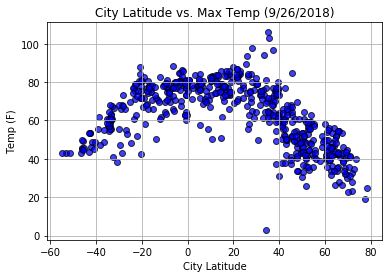

In [19]:
temp_lat = plt.scatter(lat, max_temps, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.title("City Latitude vs. Max Temp (9/26/2018)")
plt.xlabel("City Latitude")
plt.ylabel("Temp (F)")
plt.grid(True)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

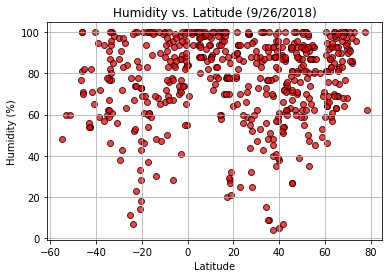

In [20]:
humid_lat = plt.scatter(lat, humidity, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("Humidity vs. Latitude (9/26/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

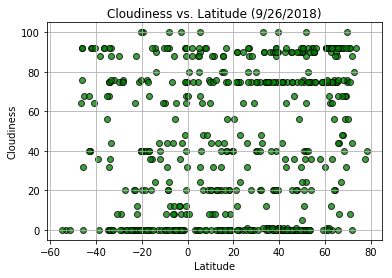

In [21]:
cloud_lat = plt.scatter(lat, clouds, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)
plt.title("Cloudiness vs. Latitude (9/26/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

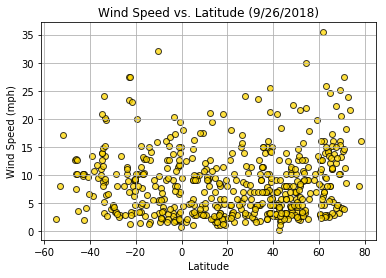

In [22]:
wind_lat = plt.scatter(lat, wind_speeds, marker="o", facecolors="gold", edgecolors="black",
             alpha=0.75)
plt.title("Wind Speed vs. Latitude (9/26/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.show